# Finding clusters in data

 "Clustering" refers to a number of algorithms that can identify structures within a dataset, i.e. concentrations of datapoints or overdensities. 
 
 No prior knowledge of the clusters (e.g. number, properties) is needed (i.e. unsupervised techniques - although it is possible to assign labels to certain clusters given a training sample).

## 1.0 Method 1: K-means

The K-means algorithm tries to partition N number of observations (with each observation being a d-dimensional vector) into $k$ individual clusters $C_k$, (with $k \leq N$). The goal is to minimize the within-cluster sum-of-squares (also called inertia) of the observations:

$$min \left (  \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2 \right )$$

where $\mu_k=\frac{1}{N_k}\sum_{i \epsilon C_k} x_i$ is the mean/centroid of the $N_k$ points included in each of the $C_k$ clusters. 

**Steps**:
1. Initiate algorithm by selecting $k$ means (easiest implementation: select randomly $k$ observations as initial means - see also [Wiki:K-means initialization](http://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods))
2. Assign each observation to the nearest cluster
3. Calculate the new mean value for each cluster $C_k$ according to the new observations assiged
4. Repeat steps 2 and 3 up to the point that there are no new assigments to the clusters.
5. All observations are assigned to a specific cluster $C_k$.

A globally optimal minimum is not guaranteed. Given enough time the algorithm will converge but this may be a local minimum. This is highly dependent on the initialization of the centroids, which means that in practice K-means is run multiple times with different starting values selecting the result with the lowest sum-of-squares error. To improve that we can initially select centrodis that are generally distant from each other. 

Moreover, since the number of clusters is not necessarily known beforehand we need implement the algorithm for a number of different $k$ values and evaluate for the optimal value.  

The K-means method is pretty simple to implement, but it has some drawbacks:
- The number of clusters (K) must be provided.
- There is an inherit assumption of isotropic clusters, which doesn't work for elongated or irregular cluster shapes.
- Inertia is not a normalized metric: lower values are better (with zero being the optimal) but as the dimensions increase so does the inertia (running a dimensionality reduction algortihm first can alleviate the problem).

**Examples**

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.
(retrieved from [scikit-learn/kmeans-assumptions](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html))

![K-means examples](kmeans-examples.png)


**Real world example (!)**

From Evans et al. 2004 we select a sample of OB stars (697) for which we have measured the equivalent widths (EQWs) of the HeII 4200 line and HeI 4471 line (for more details see Maravelias 2014, PhD thesis). The first one is a good indicator of O-type stars while the second is stronger in early B-type stars. The absence of both characterizes late B-type stars.     

In [32]:
import sys
from collections import defaultdict

def flospecConv(arg):
	"""
	Function to convert from spectral types to 
	float numbers (e.g. B0,O9.5 to 20.0,19.5)
	and backwards.
	""" 
	try:
		float(arg)
		if str(arg)[0]=='1':
			sp = 'O'
		elif str(arg)[0]=='2':
			sp = 'B'
		elif str(arg)[0]=='3':
			sp = 'A'
		else:
			sys.exit(' ! ERROR: more than O/B stars! Adjust conversion function.')
#		print arg, str(arg)[0], sp+str(arg)[1:]
		new_arg = sp+str(arg)[1:]
	except ValueError:
		if arg[0]=='O' or arg[0]=='o':
			fl = '1'
		elif arg[0]=='B' or arg[0]=='b':
			fl = '2'
		elif arg[0]=='A' or arg[0]=='a':
			fl = '3'
		else:
			sys.exit(' ! ERROR: Check input! If more than O/B stars adjust conversion function.')
#		print arg, arg[0], arg.replace(arg[0],fl)
		new_arg = float(arg.replace(arg[0],fl))

	return new_arg

# Read the file
stars=defaultdict(list)
with open('ew_2dF-OBall.out','r') as inf:
    for line in inf:
        if line[0]!='#':
#            print line
            cols = line.split()
            item = cols[0].split('/')[1]
            spline = cols[1]
            if spline=='HeI/4471':
                ewHeI = cols[2]
                stars[item].append(ewHeI)
            elif spline=='HeII/4200':
                ewHeII = cols[2]
                stars[item].append(ewHeII)

#print stars

# Create the necessary lists
sptype, flosptype, ewHeI, ewHeII = [], [], [], []
for s in stars.keys():
    sptype.append(s.split('-')[0])
    flosptype.append(flospecConv(s.split('-')[0]))
    ewHeII.append(float(stars[s][0]))
    ewHeI.append(float(stars[s][1]))
#    print s, stars[s], stars[s][0], stars[s][1]
# print sptype, flosptype


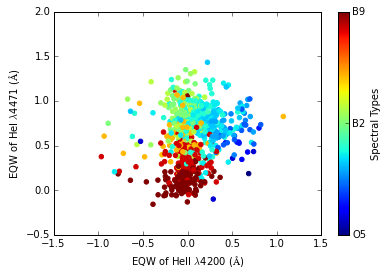

In [33]:
# Plotting original data

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

scat = plt.scatter(ewHeII, ewHeI, c=flosptype, edgecolors='face', cmap="jet")
cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
cb.set_ticklabels(['O5','B2','B9'])
cb.set_label('Spectral Types')

plt.ylabel(r"EQW of HeI $\lambda$4471 ($\AA$)")
plt.xlabel(r"EQW of HeII $\lambda$4200 ($\AA$)")
plt.show()


Labels assigned:
[1 2 0 2 1 2 2 2 1 1 1 2 2 1 2 0 0 2 0 1 1 0 1 2 2 2 2 2 2 1 1 2 2 2 0 2 1
 2 2 1 1 2 2 1 1 2 1 2 1 1 2 0 1 1 1 2 2 2 1 0 1 1 2 1 1 0 0 0 1 0 0 2 0 0
 0 2 1 2 2 0 1 2 2 1 2 0 2 1 2 1 2 1 1 0 1 2 2 1 0 1 2 1 1 1 0 2 2 2 2 2 2
 2 2 2 0 0 1 1 0 2 2 1 0 2 0 2 2 2 2 0 0 2 2 1 1 0 1 1 0 1 1 1 1 0 1 2 2 2
 1 1 2 1 0 2 2 0 2 1 1 1 2 2 2 2 2 1 1 0 1 2 2 2 1 2 0 2 1 2 0 1 0 1 2 1 2
 1 0 0 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 1 1 2 2 0 0 1 1 1 0 2 0 0 0 1 0
 2 1 1 2 2 1 2 1 2 2 1 1 1 1 0 1 1 2 2 1 1 2 2 0 2 0 1 2 2 2 1 2 1 2 2 1 2
 2 1 1 1 2 2 1 2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 2 2 0 2 2 2 2 1 0 1 0 1 1 2 0
 1 1 2 1 2 0 2 0 1 0 1 1 1 2 2 2 0 1 1 0 2 1 1 1 2 0 0 1 1 1 2 1 1 1 1 1 1
 2 2 2 1 2 2 0 0 0 2 0 1 2 0 1 1 1 1 1 0 2 0 2 2 1 0 1 2 2 0 0 0 1 1 2 2 1
 2 0 2 2 1 2 2 1 1 2 2 2 2 1 0 2 2 1 2 0 1 0 2 1 0 1 1 1 1 2 2 0 2 0 1 2 0
 0 2 2 0 0 2 2 2 1 1 2 1 2 1 0 2 1 0 2 2 1 0 1 0 0 0 1 1 0 1 1 1 1 1 2 2 0
 2 0 1 2 2 0 2 1 0 0 1 1 2 2 1 1 0 0 0 1 2 0 1 2 1 2 2 0 1 2 0 0 2 2 0 2 2
 1 1 2 1

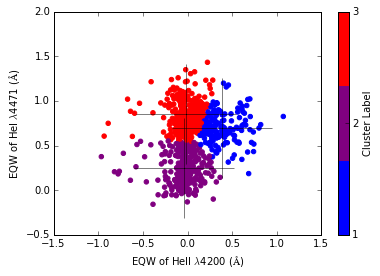

In [34]:
Clusters_kmeans = 3
from sklearn.cluster import KMeans

eqws = np.column_stack((ewHeII,ewHeI))
kmeans = KMeans(n_clusters=Clusters_kmeans, random_state=0).fit(eqws)

print "Labels assigned:"
print kmeans.labels_

print "Cluster centers:"
print kmeans.cluster_centers_

cc_x = kmeans.cluster_centers_[:,0]
cc_y = kmeans.cluster_centers_[:,1]

plt.plot(cc_x, cc_y, 'k+', ms=100)

new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
#print new_map
scat2 = plt.scatter(ewHeII, ewHeI, c=kmeans.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')
# ax.plot(cc_x, cc_y, 'k+', ms=100)

plt.ylabel(r"EQW of HeI $\lambda$4471 ($\AA$)")
plt.xlabel(r"EQW of HeII $\lambda$4200 ($\AA$)")

plt.show()



## 1.1 Mini Batch K-means

For faster computations the [scikit-learn](http://scikit-learn.org/stable/index.html) offers the [Mini Batch K-means](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) method which simply breaks the initial set of observations/data points to smaller randomly selected subsamples. For each subsample in the mini batch the assigned centroid is updated by taking into account the average of that subsample and all previous subsamples assigned to that centroid. This is prepeated until the predefined number of iterations is reached. Its results are generally only slightly worset then the standard algorithm. 

## 1.2 Alternative K-means clustering process: the Gonzalez algortihm

Similar to K-means the Gonzalez algorithm identifies clusters based on the minimization of the maximum radius of a cluster:

$$ \min_{k} max_{i \epsilon C_k} ||x_i-\mu_k|| $$

where one of the $N_k$ points of the cluster $C_k$ is assigned as the centroid of the cluster $\mu_k$. In this way we start to build up the clusters by finding the observation $x_i$ that maximizes the distance from the centers of existing clusters and setting this as the next cluster center. The process repeats until we construct $K$ clusters. Each observation is assigned the label of its closest cluster center.    

# Method 2: mean-shift 

This algorithm is able to identify arbitrarily shaped clusters (blobs) by locating the peaks of a density function given discrete data sampled from that function. Starting from an initial estimate for a centroid $x$ the algortih iterates over a weighted distance estimate and re-calculates the mean, defined as:

$$m(x)=\frac{ \sum_{x_i\epsilon N(x)}K(x_i-x)x_i}{\sum_{x_i\epsilon N(x)}K(x_i-x)}$$

where $K(x_i-x)$ is a kernel function (typically Gaussian: $K(x_i-x)=e^{-c||x_i-x||^2}$) and $N(x)$ is a neighborhood of points within a given distance around $x$ (for which $K(xi) \neq 0$). The difference $m(x)-x$ is called **mean shift** and after each iteration ($t$) $x^{t+1}$ is substituted by $m(x^t)$ until it converges. This is similar to climbing a hill, since the mean shift decreases as we move towards increasing density of points (a local peak). 

The number of the peaks/clusters to be found is provided implicitly by the method. It depends on the *bandwith* (h) which is basically the size of the region to search through.    

number of estimated clusters : 4
[[ 0.07543271  0.75120859]
 [ 0.00787065  0.34549733]
 [-0.64016011  0.33814738]
 [-0.62413213  0.71164664]]
[1 3 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 2 1 0 2 1 0 0 0 1 0 0 0 0 0
 0 0 2 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 3 3 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 2 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 1 1 0 0 3 0 1 0 0 1 1 2 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 2 0
 0 1 1 1 0 0 1 3 0 0 1 0 1 2 1 1 0 1 1 1 0 1 0 0 0 3 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 2
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 2 0 1 0 0 

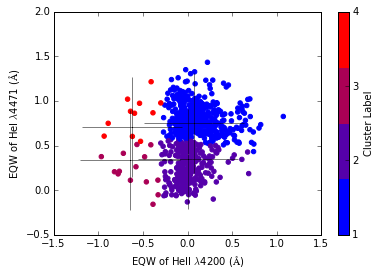

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# if we want to tweak more the culster identification:
#bandwidth = estimate_bandwidth(eqws, quantile=0.2, n_samples=500)
#ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms = MeanShift()
ms.fit(eqws)
labels = ms.labels_

Clusters_ms = len(np.unique(labels))


print("number of estimated clusters : %d" % Clusters_ms)

print ms.cluster_centers_
cc_x2 = ms.cluster_centers_[:,0]
cc_y2 = ms.cluster_centers_[:,1]

print labels

plt.plot(cc_x2, cc_y2, 'k+', ms=100)

new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_ms)
#print new_map
scat3 = plt.scatter(ewHeII, ewHeI, c=ms.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat3, ticks=range(0,Clusters_ms+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_ms+2,1))
cb.set_label('Cluster Label')

plt.ylabel(r"EQW of HeI $\lambda$4471 ($\AA$)")
plt.xlabel(r'EQW of HeII $\lambda$4200 ($\AA$)')

plt.show()

## Sources:

- Z Ivezic, A. J. Connolly, J. T. VanderPlas, and A. Gray, *"Statistics, Data Mining, and Machine Learning in Astronomy"*, Princeton University Press, 2014
- [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
- [Wiki: k-means clustering](http://en.wikipedia.org/wiki/K-means_clustering)
- [Wiki: mean shitf](http://en.wikipedia.org/wiki/DBSCAN)
- Evans et al 2004, MNRAS, 353, 601 ([NASA/ADS link](http://adsabs.harvard.edu/abs/2004MNRAS.353..601E))
- Maravelias 2014, PhD thesis ([link](http://skinakas.physics.uoc.gr/en/research/theses/GrMaraveliasPhD.pdf))